In [1]:
import nltk
nltk.download("punkt")

from nltk.tag import UnigramTagger
from nltk.corpus import treebank
nltk.download('treebank')
import pandas as pd

import os
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.sentiment.util import mark_negation


nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/mtissot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/mtissot/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mtissot/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/mtissot/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mtissot/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Load Data

In [2]:
#from google.colab import drive
#drive.mount('/content/dossiers')
path = "/Users/mtissot/Desktop/M2-DIA/NLP/pw2/review_polarity/txt_sentoken"
path_neg = "/neg/"
path_pos = "/pos/"

In [3]:
def load_reviews(path):
    reviews = []
    labels  = []

    for filename in os.listdir(path):
        if filename.endswith(".txt"):
            with open(os.path.join(path, filename), "r", encoding="utf-8") as file:
                review = file.read()
                reviews.append(review)
                if path.endswith("pos/"):
                    labels.append("positive")
                elif path.endswith("neg/"):
                    labels.append("negative")

    return reviews, labels

In [4]:
positive_reviews, positive_labels = load_reviews(path+path_pos)
negative_reviews, negative_labels = load_reviews(path+path_neg)

all_reviews = positive_reviews + negative_reviews
all_labels = positive_labels + negative_labels

In [5]:
print("Positive Review:\n")
print(positive_reviews[10][:500],"etc...")
print("\nLabel:", positive_labels[10])

Positive Review:

who would have thought ? 
jim carrey does drama . 
when i first saw the advertisement for the truman show , i thought , " what a hilarious idea for a movie ! " 
however , it was an even better premise for a drama . 
the truman show takes us into a world that revolves around one man . 
that man is truman burbank ( jim carrey ) . 
truman has no clue what is really going on in his world and frankly , cristof wants to keep it that way . 
christof is the " god " of this made-up world . 
he keeps ever etc...

Label: positive


In [6]:
print("Negative Review:\n")
print(negative_reviews[10][:500],"etc...")
print("\nLabel:", negative_labels[10])

Negative Review:

starring shawnee smith ; donovan leitch ; ricky paull goldin ; kevin dillon & billy beck the blob is the remake of the 1960's classic ( a term that i use very loosely to define the original ) about a really mean glob of goop that takes out anything that gets in its way . 
now the original version has the virtue of cheesy special effects which give it a kind of nostalgic campy feel . 
the fact that steve mcqueen was the star of the film doesn't exactly hurt it either . 
fast forward to the late ' etc...

Label: negative


## Words identification

With UnigramTagger using Treebank corpus find if a word is an adverb or verb or noun...

In [7]:
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
tagged_sents = nltk.corpus.treebank.tagged_sents()
unigram_tagger = UnigramTagger(tagged_sents)

In [8]:
#Identification des adejctifs / adverbes
def find_tag(tagged_sentence,tag_name="JJ"):
    words = [word for word, tag in tagged_sentence if tag and tag.startswith(tag_name)]
    return words

def classWords(review,tokenizer,unigram_tagger,tag_name="JJ"):
  sentences = tokenizer.tokenize(review) #tokenize chaque critique en liste de phrases
  word_class=[]
  for sentence in sentences:
    words = word_tokenize(sentence)                     # Tokenize chaque phrase liste de mots
    tagged_words = unigram_tagger.tag(words)            # Etiquetage
    word_class.extend(find_tag(tagged_words,tag_name))  # Identifie les adverbes
  return word_class

**Exemple on a positive review**

In [9]:
review = all_reviews[0][:400]
all_labels[0]

'positive'

**find adjectives**

In [10]:
tag_name   = "JJ"  #adverbe = RB, adjectif = JJ
classWords(review,tokenizer,unigram_tagger,tag_name)

['most', 'first', 'main', 'funny']

**find adverbs**

In [11]:
tag_name   = "RB"  #adverbe = RB, adjectif = JJ
classWords(review,tokenizer,unigram_tagger,tag_name)

['perhaps', 'hardly', 'ever', 'especially']

## Words scoring to evaluate sentiment

In [12]:
def getnewTag(tag_name):
  sentiwordnet_pos = None
  if tag_name.startswith("JJ"):   # Adjectif
    sentiwordnet_pos = 'a'
  elif tag_name.startswith("RB"): # adverb
    sentiwordnet_pos = 'r'
  elif tag_name.startswith("V"):  # Verb
    sentiwordnet_pos = 'v'
  elif tag_name.startswith("NN"): #Noun
    sentiwordnet_pos = 'n'
  return sentiwordnet_pos

def getSentiment(tagged_word,tag_name):
  tag_name = getnewTag(tag_name)
  if tag_name:
    synsets = list(swn.senti_synsets(tagged_word, tag_name))
    if synsets:
      synset = synsets[0]
      return synset.pos_score() - synset.neg_score()
    return 0

**Exemple on a positive review**

In [13]:
review = all_reviews[0][:400]
all_labels[0]

'positive'

In [14]:
tag_name   = "JJ"  #adverbe = RB, adjectif = JJ
classWords(review,tokenizer,unigram_tagger,tag_name)

['most', 'first', 'main', 'funny']

**find adjectives sentiment**

In [15]:
#nltk.download('omw-1.4')
tag_name   = "JJ"  #adverbe = RB, adjectif = JJ
adj_words = classWords(review,tokenizer,unigram_tagger,tag_name)

for w in adj_words:
    sentiment = getSentiment(w,tag_name)
    print(f"{w}: Sentiment Score = {sentiment:.2f}")

most: Sentiment Score = 0.00
first: Sentiment Score = 0.00
main: Sentiment Score = 0.38
funny: Sentiment Score = 0.50


**find adverbs sentiment**

In [16]:
tag_name   = "RB"  #adverbe = RB, adjectif = JJ
adj_words = classWords(review,tokenizer,unigram_tagger,tag_name)

for w in adj_words:
    sentiment = getSentiment(w,tag_name)
    print(f"{w}: Sentiment Score = {sentiment:.2f}")

perhaps: Sentiment Score = 0.00
hardly: Sentiment Score = 0.12
ever: Sentiment Score = 0.00
especially: Sentiment Score = 0.00


## Classify a Review

In [17]:
import numpy as np
def getReviewScore(review,tag_names):
  score = 0
  count = 0

  for tag in tag_names:
    words = classWords(review,tokenizer,unigram_tagger,tag)
    score += np.sum([getSentiment(w,tag) for w in words])
    count += len(words)

  if count > 0:
    score = score / count

  return score

def classifyReview(review, tag_names, threshold=0.1):
    score = getReviewScore(review, tag_names)
    if score < 0 : return "Negative"
    else: return 'Positive'


**Exemple on a positive review**

In [18]:
review = all_reviews[0]
all_labels[0]

'positive'

**find global sentiment evaluating adjectivs**

In [19]:
tag_name   = "JJ"
print("score",getReviewScore(review, [tag_name]))
print("sentiment",classifyReview(review, [tag_name]))

score 0.06402439024390244
sentiment Positive


**find global sentiment evaluating adverbs**

In [20]:
tag_name   = "RB"
print("score",getReviewScore(review, [tag_name]))
print("sentiment",classifyReview(review, [tag_name]))

score -0.09883720930232558
sentiment Negative


**Find global sentiment evaluating both**

In [21]:
print("score",getReviewScore(review, ["RB","JJ"]))
print("sentiment",classifyReview(review,["RB","JJ"]))

score -0.019345238095238096
sentiment Negative


## Evaluate all review

In [22]:
def classifyAllReviews(reviews, tag_names, threshold=0.0, expected_label='Positive'):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    correctly_classified = 0

    for review in reviews:
        result = classifyReview(review, tag_names, threshold)

        if result == expected_label:
            true_positives += 1
        elif result != expected_label and expected_label == 'Positive':
            false_negatives += 1
        else:
            false_positives += 1

    precision = true_positives / (true_positives + false_positives)
    recall    = true_positives / (true_positives + false_negatives)
    accuracy  = true_positives / len(reviews) * 100

    return precision, accuracy, recall



In [23]:
positive_acc=[]
positive_acc.append(classifyAllReviews(positive_reviews,["V"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["JJ"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["RB"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["NN"],0,"Positive"))

positive_acc.append(classifyAllReviews(positive_reviews,["V","JJ"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["JJ","RB"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["V","RB"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["V","NN"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["JJ","NN"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["NN","RB"],0,"Positive"))

positive_acc.append(classifyAllReviews(positive_reviews,["JJ","RB","V"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["JJ","RB","NN"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["JJ","NN","V"],0,"Positive"))
positive_acc.append(classifyAllReviews(positive_reviews,["NN","RB","V"],0,"Positive"))

positive_acc.append(classifyAllReviews(positive_reviews,["NN","RB","V","NN"],0,"Positive"))

Negative

In [24]:
negative_acc=[]
negative_acc.append(classifyAllReviews(negative_reviews,["V"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["JJ"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["RB"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["NN"],0,"Negative"))

negative_acc.append(classifyAllReviews(negative_reviews,["V","JJ"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["JJ","RB"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["V","RB"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["V","NN"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["JJ","NN"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["NN","RB"],0,"Negative"))

negative_acc.append(classifyAllReviews(negative_reviews,["JJ","RB","V"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["JJ","RB","NN"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["JJ","NN","V"],0,"Negative"))
negative_acc.append(classifyAllReviews(negative_reviews,["NN","RB","V"],0,"Negative"))

negative_acc.append(classifyAllReviews(negative_reviews,["NN","RB","V","NN"],0,"Negative"))

In [25]:
positive_acc = np.array(positive_acc)
negative_acc = np.array(negative_acc)
print(f"Number of metrics {np.shape(positive_acc)[0]}")
print(f"Number of models {np.shape(positive_acc)[1]}")

Number of metrics 15
Number of models 3


In [26]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np


# Noms des classes (étiquettes)
#classes = [f"{i}" for i in range(15)]

# Largeur des barres
bar_width = 0.3
# Position des barres sur l'axe x
indices = np.arange(np.shape(positive_acc)[0])

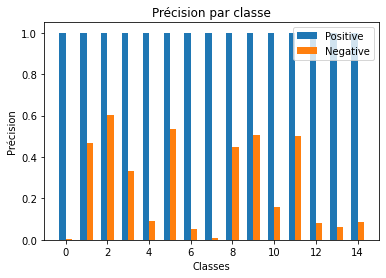

In [27]:
i=0
plt.bar(indices - bar_width/2, positive_acc[:,i], bar_width, label='Positive')
plt.bar(indices + bar_width/2, negative_acc[:,i], bar_width, label='Negative')

plt.xlabel('Classes')
plt.ylabel('Précision')
plt.title('Précision par classe')
plt.legend()

plt.show()

La precision est très bien pour tous les positifs, mais beaucoup de commentaires negatifs sont comptés comme positifs, les meilleurs resultats restent aux indices 2 puis 5, 9 et 11 et enfin 1

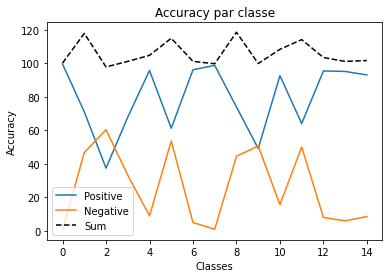

In [28]:
i=1

#plt.bar(indices - bar_width/2, positive_acc[:,i], bar_width, label='Positive')
#plt.bar(indices + bar_width/2, negative_acc[:,i], bar_width, label='Negative')
plt.plot(positive_acc[:,i],label='Positive')
plt.plot(negative_acc[:,i],label='Negative')

plt.plot(negative_acc[:,i]+positive_acc[:,i],linestyle="dashed",color="black",label='Sum')

plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracy par classe')
plt.legend()

plt.show()

L'accuracy est la meilleur pour les indices 1, 8 et 11, puis 3 et 5

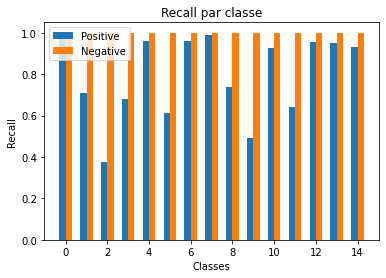

In [29]:
i=2

plt.bar(indices - bar_width/2, positive_acc[:,i], bar_width, label='Positive')
plt.bar(indices + bar_width/2, negative_acc[:,i], bar_width, label='Negative')

plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall par classe')
plt.legend()

plt.show()

Revoir la formule du recall

## **best model : indice 5 => using ["JJ","RB"] : adverbes and adjectives to predict the sentiment**

In [1]:
!pip install -q streamlit
#import streamlit as st
#%%writefile app.py
#import streamlit as st
#st.write('Hello, *World!* :sunglasses:')

#!npm install localtunnel
#!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com
#!npx localtunnel --port 8501

ERROR: Could not find a version that satisfies the requirement streamlit (from versions: none)
ERROR: No matching distribution found for streamlit
